In [2]:
import prtools as pr
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from jupyterthemes import jtplot
jtplot.style(theme="oceans16")

# Exercise 2.2

#### c) Construct an example data set, for which the inverse of X TX exists, while the inverse for Z T Z does not.

In [7]:
X = np.array([[2,1],[2,3]])
XX = np.dot(X.T,X)
XX_inv = np.linalg.inv(XX)
print("X: ","\n",str(X))
print("XX:", "\n", str(XX))
print("XX_inv", "\n", str(XX_inv))
bias = np.ones((2,1))
Z = np.hstack((X, bias))
ZZ = np.dot(Z.T,Z)
# ZZ_inv = np.linalg.inv(ZZ)

print("Z: ","\n",str(Z))
print("ZZ:", "\n", str(ZZ))
print("ZZ_inv", "\n", "singular martrix")

X:  
 [[2 1]
 [2 3]]
XX: 
 [[ 8  8]
 [ 8 10]]
XX_inv 
 [[ 0.625 -0.5  ]
 [-0.5    0.5  ]]
Z:  
 [[2. 1. 1.]
 [2. 3. 1.]]
ZZ: 
 [[ 8.  8.  4.]
 [ 8. 10.  4.]
 [ 4.  4.  2.]]
ZZ_inv 
 singular martrix


# Exercise 2.3

#### c) Describe how the linear least squares solutions look if 
X =$\left(
 \begin{matrix}
   1 & 1  \\
   -2 & 1
  \end{matrix}
  \right)
$ and Y = $\left(
 \begin{matrix}
  1\\
  -1
  \end{matrix}
  \right)
$ 

In [8]:
X = np.array([[1,1],[-2,1]])
Y = np.array([[-1],[1]])

XX = np.dot(X.T, X)
XX_inv = np.linalg.inv(XX)
XY = np.dot(X.T, Y)

w = np.dot(XX_inv, XY)

print("w: ", '\n', str(w))

w:  
 [[-0.66666667]
 [-0.33333333]]


#### d) what is the sum of the squared residuals in this case?

In [9]:
sqres = np.sum(np.square(np.dot(X,w)-Y))
print(sqres)

0.0


# Exercise 2.4
#### Consider a regression training data set with four 1D inputs $X = (−2, −1, 0, 3)^T$ and corresponding outputs $Y = (1, 1, 2, 3)^T$ .

#### a) 
Let us assume that we ﬁt a linear function **without intercept** to this data under squared loss. Calculate the optimal function ﬁt for the given data set.

In [20]:
X = np.array([-2,-1,0,3]).T
Y = np.array([1,1,2,3]).T
XX = np.dot(X.T,X)
XX_inv = 1./XX
XY = np.dot(X.T,Y)

w = XX_inv * XY
print("w: ", '\n', str(w))

sqres = np.sum(np.square(np.dot(X,w)-Y))
print("sqres: ",'\n',sqres)

w:  
 0.42857142857142855
sqres:  
 12.42857142857143


#### b) 
Let us now also **include an intercept**. Still, we stick to ﬁtting linear functions that we ﬁt using the squared loss. Calculate the optimal value that we ﬁnd for the **intercept**.

In [22]:
X = np.array([-2, -1, 0, 3]).reshape(4,1)
bias = np.ones((4,1))
X = np.hstack((X,bias))

XX = np.dot(X.T, X)
XX_inv = np.linalg.inv(XX)
XY = np.dot(X.T, Y)

w = np.dot(XX_inv, XY) # 不能直接*，需要用np.dot
print("w:", '\n', str(w))

sqres = np.sum(np.square(np.dot(X, w) - Y))
print("sqres: ",'\n',sqres)

w: 
 [0.42857143 1.75      ]
sqres:  
 0.17857142857142852


# Exercise 2.5

Using **gendatr** or **prdataset**, generate data where the inputs x are drawn uniformly from the interval [0, 1] and the corresponding outputs y are obtained by squaring this value and adding Gaussian noise to the inputs: $y = x^2 + ε$ with $ε$ a random sample from the standard normal distribution.

In [29]:
help (pr.gendatr)

Help on function gendatr in module prtools.dataset:

gendatr(x, targets)
    Generate a regression dataset
    
          a = gendatr(X,Y)
    
    Generate a regression dataset from data matrix X and target values
    Y. Data matrix X should be NxD, where N is the number of objects,
    and D the feature dimensionality. Target Y should be Nx1.
    
    Example:
    x = numpy.random.randn(100,2)
    y = numpy.sin(x[:,0])*numpy.sin(x[:,1])
    a = gendatr(x,y)



In [30]:
help (pr.prdataset)

Help on class prdataset in module prtools.dataset:

class prdataset(builtins.object)
 |  prdataset(data, targets=None)
 |  
 |  Prdataset in python
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |  
 |  __div__(self, other)
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, data, targets=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __mul__(self, other)
 |  
 |  __pos__(self)
 |  
 |  __rmul__(self, other)
 |  
 |  __setitem__(self, key, item)
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  __sub__(self, other)
 |  
 |  classsizes(self)
 |  
 |  concatenate(self, other, axis=None)
 |  
 |  findclass(self, cname)
 |  
 |  float(self)
 |  
 |  getprior(self)
 |  
 |  gettargets(self, labelname)
 |  
 |  lablist(self)
 |  
 |  nlab(self)
 |  
 |  nrclasses(self)
 |  
 |  setdata(self, data)
 |  
 |  settargets(self, labelname, targets)
 |  
 |  showtargets(self, I=None)
 |  
 |  signlab(self, posclass=1)
 |  
 |  ------

In [23]:
x = np.random.uniform(low=0, high=1, size=(400)).reshape(400,1)
y = x ** 2 + np.random.normal(size=(1))

x1 = x
x2 = np.hstack((x1, x1 ** 2))
x3 = np.hstack((x2, x1 ** 3))

print(x1.shape)
print(x2.shape)
print(x3.shape)

(400, 1)
(400, 2)
(400, 3)


a) Study the behavior of polynomials of degree 0 to 3 for diﬀerent training set sizes (e.g. 4, 40, and 400 samples?). You may want to have a look at the data and the ﬁtted polynomial models. You can also estimate the **squared error** using a somewhat large test set.

In [24]:
bias = np.ones((400,1))
Y = y

for x in [x1, x2, x3]:
    X = np.hstack((x, bias))
    XX = np.dot(X.T, X)
    XX_inv = np.linalg.inv(XX)
    XY = np.dot(X.T, Y)
    
    w = np.dot(XX_inv, XY)
    print("w: ", '\n', str(w))
    
    sqres = np.sum(np.square(np.dot(X, w) - Y))
    print("sqres: ",'\n', sqres)
    print()
    

w:  
 [[ 0.99723794]
 [-0.29949534]]
sqres:  
 2.0864836588607285

w:  
 [[-1.77635684e-15]
 [ 1.00000000e+00]
 [-1.31304134e-01]]
sqres:  
 6.637058885289628e-27

w:  
 [[-8.52651283e-14]
 [ 1.00000000e+00]
 [-1.70530257e-13]
 [-1.31304134e-01]]
sqres:  
 1.4325796853801183e-26



In [27]:
for xi in[x1, x2, x3]:
    reg = LinearRegression().fit(xi,y)
    y_pred = reg.predict(xi)
    print("MSE: ", mean_squared_error(y, y_pred))
    print(reg.coef_, '\n', reg.intercept_)
    print()

MSE:  0.005216209147151822
[[0.99723794]] 
 [-0.29949534]

MSE:  1.4166177705940315e-32
[[2.34884327e-16 1.00000000e+00]] 
 [-0.13130413]

MSE:  5.101046939653198e-31
[[ 6.38115799e-15  1.00000000e+00 -5.54178664e-15]] 
 [-0.13130413]



In [28]:
for xi in [x1, x2, x3]:
    data = pr.gendatr(xi, y)
    w = pr.linearr(data)
    print("MSE: ", pr.testr(data, w.eval(data)))
    print("w: ", +w)
    print()

MSE:  0.0957419649611328
w:  [[-0.29949534]
 [ 0.99723794]]

MSE:  0.056491370344451036
w:  [[-1.31304134e-01]
 [ 1.46271883e-14]
 [ 1.00000000e+00]]

MSE:  0.03924497603620503
w:  [[-1.31304134e-01]
 [ 3.44169138e-14]
 [ 1.00000000e+00]
 [ 5.58442181e-14]]



# Exercise 2.7
#### Consider the following regression problem from 2D to 1D. The input vectors x are from a standard normal distribution in 2D. The corresponding outputs, y, are obtained through the following equation: $y = 50 sin(x1) sin(x2) + ε$, where $ε$ has a standard normal distribution as well (but in 1D of course).

a) Visualize 10,000 samples from this regression problem and have a look at the data from diﬀerent points of view.

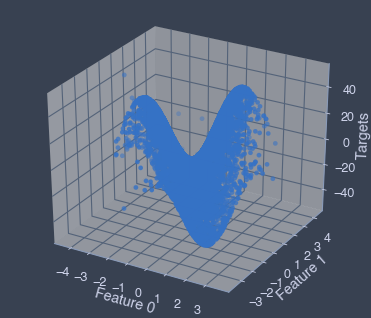

In [36]:
x = np.random.randn(10000,2)
y = 50 * np.sin(x[:,0]) * np.sin(x[:,1])

data = pr.gendatr(x,y)
pr.scatterr(data)

b) **Fit a linear linear regression** to these 10,000 points and **measure the error** on a separate test set.

In [37]:
x1 = x
x2 = np.hstack((x1, x1 ** 2))
x3 = np.hstack((x2, x1 ** 3))

print(x1.shape)
print(x2.shape)
print(x3.shape)

(10000, 2)
(10000, 4)
(10000, 6)


In [38]:
for xi in [x1,x2,x3]:
    reg = LinearRegression().fit(xi,y)
    y_pred = reg.predict(xi)
    print("MSE: ", mean_squared_error(y,y_pred))
    print(reg.coef_, '\n', reg.intercept_)
    print()

MSE:  473.72698350827966
[-0.03313549  0.13846934] 
 -0.11482073357373593

MSE:  473.71503172387906
[-0.03384505  0.14019131 -0.02943784 -0.07161276] 
 -0.01272637466069397

MSE:  473.39087766067945
[ 0.42121412 -0.3898133  -0.05865621 -0.08777486 -0.14989528  0.1775117 ] 
 0.021376418465866867



Big error, the ﬁt is basically a constant at 0. The ﬁt with higher degrees is basically constant at 0 for all degrees that are not insanely large.

e) Let the input x be as in the above, but now take $y = x1*x2$. Fit linear regressions of degree 1 and 2 and report the error they make and/or visualize the solutions in comparison with the actual training data.

In [40]:
y = x[:,0] * x[:,1]
for xi in [x1,x2]:
    reg = LinearRegression().fit(xi,y)
    y_pred = reg.predict(xi)
    print("MSE: ", mean_squared_error(y,y_pred))
    print(reg.coef_, '\n', reg.intercept_)
    print()

MSE:  1.015687883742405
[0.00171094 0.01293984] 
 -0.008017548940299744

MSE:  1.0150828133438916
[ 0.00092208  0.01308018 -0.015659   -0.00718734] 
 0.015013101840494321



2.0104277188279527

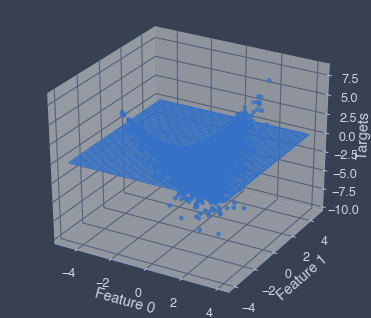

In [41]:
data = pr.gendatr(x1, y)
w = pr.linearr(data)
pr.scatterr(data)
pr.plotr(w)
pr.testr(data, w.eval(data))